1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


shape of the matrix (3, 1000)
eigenvalues of X  [ 2.84810898e+01 -1.20926989e-15  1.96524901e+00]
eigenvectors of X  [[-0.11465738 -0.81649658  0.5658507 ]
 [-0.57836537 -0.40824829 -0.70627674]
 [-0.80768013  0.40824829  0.42542466]]
eigenvalues of X with SVD  [1.69212304e+02 4.43383226e+01 1.34158129e-14]
eigenvectors of X with SVD  [[-0.11419624  0.56594395 -0.81649658]
 [-0.57894071 -0.70580521 -0.40824829]
 [-0.80733319  0.42608269  0.40824829]]
NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION
Percent of the total variability is explained by the principal components  0.9354520415570395
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
(2, 2)
Percent of the total variability is explained by the principal components  1.0
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
eigenvalues of Xp with SVD  [1.69212304e+02 4.43383226e+01 4.38900520e-15]
ei

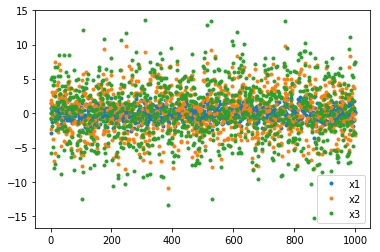

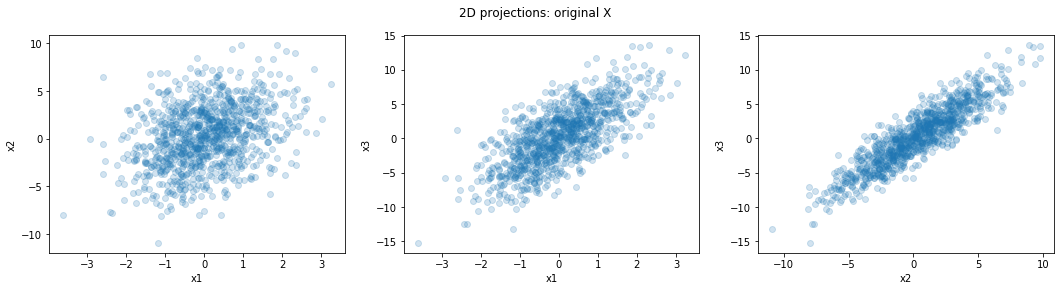

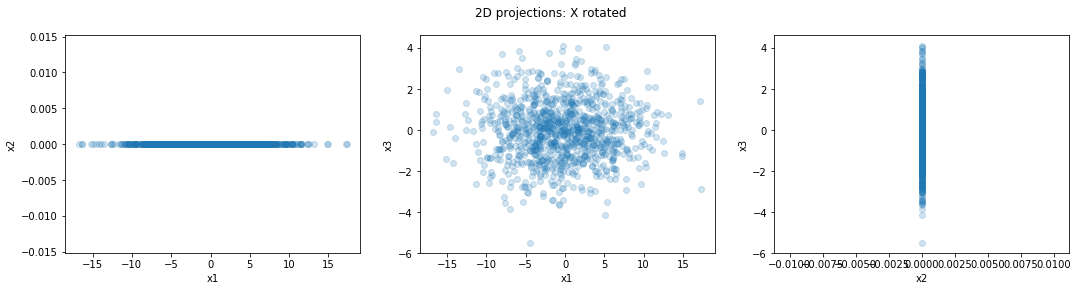

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline

# 1

N = 1000
mu, sigma = 0, 1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, N)
mu, sigma = 0, 3 # mean and standard deviation
x2 = x1 + np.random.normal(mu, sigma, N)
x3 = 2*x1 + x2

# 2

X = np.array([x1, x2, x3])
print('shape of the matrix', X.shape)
l, V = np.linalg.eig(np.cov(X))
print('eigenvalues of X ', l)
print('eigenvectors of X ', V)
plt.plot(x1, '.')
plt.plot(x2, '.')
plt.plot(x3, '.')
plt.legend(['x1', 'x2', 'x3'])

# 3

U, D, Vt = la.svd(X)
l_svd = D
V_svd = U

print('eigenvalues of X with SVD ', l_svd)
print('eigenvectors of X with SVD ', V_svd)
print('NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION')

np.allclose(l, l_svd)
np.allclose(V, V_svd)

# 4

Lambda=np.diag(l) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace()) # taking 93.6% of the overall variability of our dataset
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

Lambda=np.diag(l[0:2]) # taking only two largest eigenvalues
print(Lambda.shape)
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

# 5
# generates new coordinates
# rotate all the data points accordingly to the new base
Xp = np.dot(V.T, X)

U, D, Vt = la.svd(Xp)
l_svd = D
V_svd = U
print('eigenvalues of Xp with SVD ', l_svd)
print('eigenvectors of Xp with SVD ', V_svd)
Lambda=np.diag(l_svd) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())

# 6
fig, ax = plt.subplots(1, 3, figsize=(18,4))
# original
x1 = X[0,:]
x2 = X[1,:]
x3 = X[2,:]
plt.suptitle('2D projections: original X')
ax[0].scatter(x1, x2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(x1, x3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(x2, x3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()
# new coordinates
xn1 = Xp[0,:]
xn2 = Xp[1,:]
xn3 = Xp[2,:]
fig, ax = plt.subplots(1, 3, figsize=(18,4))
plt.suptitle('2D projections: X rotated')
ax[0].scatter(xn1, xn2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(xn1, xn3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(xn2,xn3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

shape of the matrix (3, 1000)
eigenvalues of X  [28.45935907  0.29732168  1.97999137]
eigenvectors of X  [[-0.11597669 -0.83881524  0.53191954]
 [-0.58004549 -0.37752853 -0.72181676]
 [-0.8062857   0.39225145  0.44276649]]
eigenvalues of X with SVD  [169.15377838  44.50417782  17.23441071]
eigenvectors of X with SVD  [[-0.11554915  0.53199571 -0.83882594]
 [-0.58064246 -0.72134857 -0.37750573]
 [-0.80591732  0.4434375   0.39225051]]
NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION
Percent of the total variability is explained by the principal components  0.9259089257650723
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
(2, 2)
Percent of the total variability is explained by the principal components  0.9896607788331928
NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED
eigenvalues of Xp with SVD  [169.15377838  44.50417782  17.23441071]
eigenvector

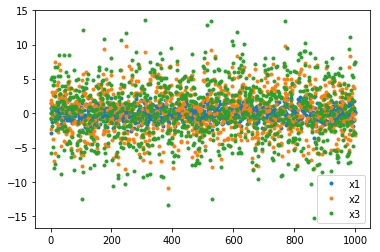

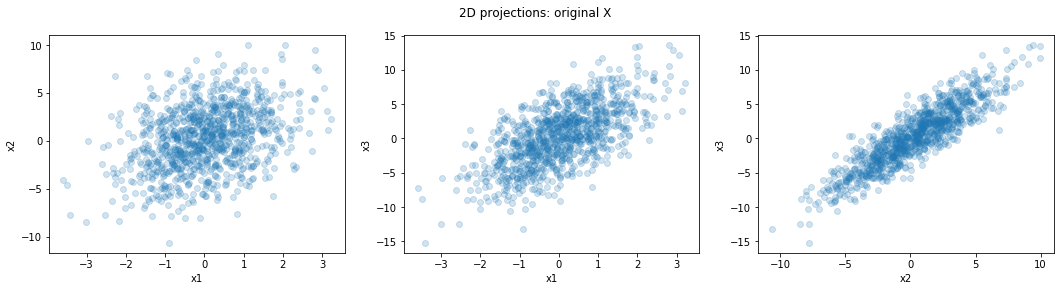

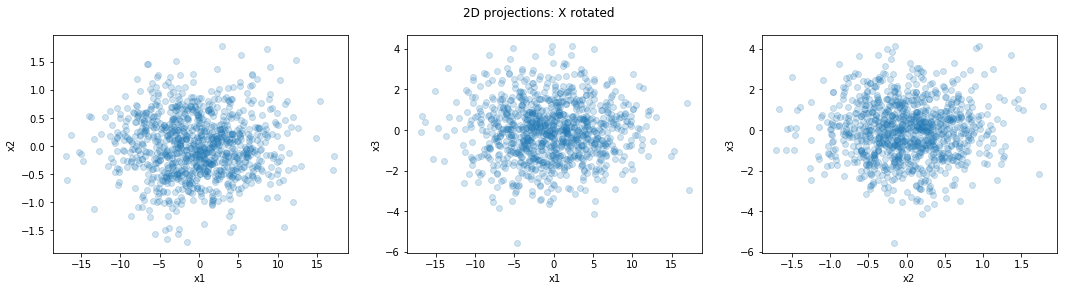

In [151]:
# uncorrelated random noise
c = 1/50
n_noise = 10
sigma = np.diag(np.ones(n_noise)*c)
mu = np.zeros(n_noise)
X_err = np.random.multivariate_normal(mu, sigma, 1000).T
X_err = np.sum(X_err, axis=0)
X = X_err + np.array([x1, x2])
X = np.reshape(np.append(X, x3),(3,N))
# COPIED FROM ABOVE, adding noise changes the plots in the second row

print('shape of the matrix', X.shape)
l, V = np.linalg.eig(np.cov(X))
print('eigenvalues of X ', l)
print('eigenvectors of X ', V)
plt.plot(x1, '.')
plt.plot(x2, '.')
plt.plot(x3, '.')
plt.legend(['x1', 'x2', 'x3'])

# 3

U, D, Vt = la.svd(X)
l_svd = D
V_svd = U

print('eigenvalues of X with SVD ', l_svd)
print('eigenvectors of X with SVD ', V_svd)
print('NOTE: SAME EIGENVECTOR, SLIGHTLY DIFFERENT EIGENVALUES BECAUSE OF DIFFERNET PRECISION')

np.allclose(l, l_svd)
np.allclose(V, V_svd)

# 4

Lambda=np.diag(l) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace()) # taking 93.6% of the overall variability of our dataset
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

Lambda=np.diag(l[0:2]) # taking only two largest eigenvalues
print(Lambda.shape)
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())
print("NOTE: IT MAKES SENSE BECAUSE THE DATA WAS CREATED RANDOMLY AND THE THREE VECTORS IN X ARE CORRELATED")

# 5
# generates new coordinates
# rotate all the data points accordingly to the new base
Xp = np.dot(V.T, X)

U, D, Vt = la.svd(Xp)
l_svd = D
V_svd = U
print('eigenvalues of Xp with SVD ', l_svd)
print('eigenvectors of Xp with SVD ', V_svd)
Lambda=np.diag(l_svd) # big lambda
print ("Percent of the total variability is explained by the principal components ", Lambda[0,0]/Lambda.trace())

# 6
fig, ax = plt.subplots(1, 3, figsize=(18,4))
# original
x1 = X[0,:]
x2 = X[1,:]
x3 = X[2,:]
plt.suptitle('2D projections: original X')
ax[0].scatter(x1, x2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(x1, x3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(x2, x3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()
# new coordinates
xn1 = Xp[0,:]
xn2 = Xp[1,:]
xn3 = Xp[2,:]
fig, ax = plt.subplots(1, 3, figsize=(18,4))
plt.suptitle('2D projections: X rotated')
ax[0].scatter(xn1, xn2, alpha=0.2)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(xn1, xn3, alpha=0.2)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[2].scatter(xn2,xn3, alpha=0.2)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.

Notes: None of them is pointed in the right direction. Uniform in x, random in y. Take n rotation defined by two angles and rotate the 2 original variable according. You simulate each camera and perform PCA, I should obtain a 1D, same vector. Sensor are taking values in differnet coordinates, many features -> PCA -> obtain 1d vector

[298 165 228 269 357  65 295 259 108 181] [197 291  88 139  11 170 282  20 137 325]
(3, 1000)
(3, 1000)
(3, 1000)


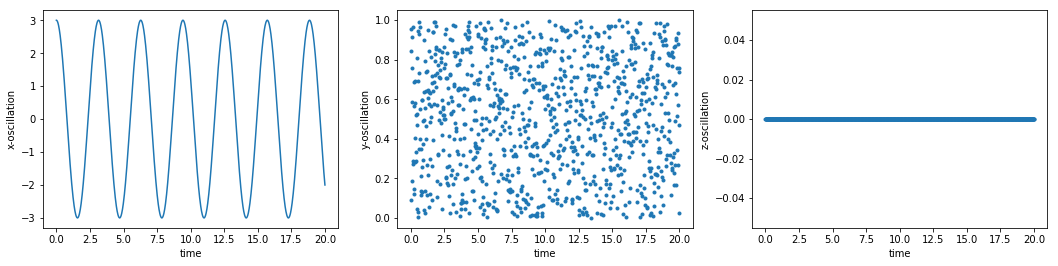

In [152]:
# compute rotation matrix for tetha and gamma
def Rx(angle):
    s = np.sin(angle)
    c = np.cos(angle)
    return [[1, 0,  0],
             [0, c, -s],
             [0, s,  c]]
def Ry(angle):
    s = np.sin(angle)
    c = np.cos(angle)
    return [[c,  0, s],
             [0,  1, 0],
             [-s, 0, c]]

# no rotation along z
# def Rz(angle):
#     s = np.sin(angle)
#     c = np.cos(angle)
#     return [[c, -s, 0],
#              [s,  c, 0],
#              [0,  0, 1]]

n = 10 # number of cameras looking at a spring osciallating along the x axis
n_records = 1000
tetha, gamma = np.random.randint(0,360,n), np.random.randint(0,360,n) # camera looking direction
print(tetha, gamma)
# tetha, gamma = np.deg2rad(tetha), np.deg2rad(gamma)

fi = 0
A = 3
w = 2
t = np.linspace(0,20,n_records)
x = A*np.cos(w*t-fi)
y = np.random.uniform(size=n_records) # random noise in y
z = np.zeros(n_records)

X = np.array([x, y, z])
print(X.shape)
# X = X.reshape(3,n_records).T
# print(X[0])

fig, axes = plt.subplots(1, 3, figsize=(18,4))
axes[0].set_xlabel('time')
axes[0].set_ylabel('x-oscillation')
axes[0].plot(t,X[0,:])

axes[1].plot(t,X[1,:],'.')
axes[1].set_xlabel('time')
axes[1].set_ylabel('y-oscillation')
print(X.shape)

axes[2].plot(t,X[2,:],'.')
axes[2].set_xlabel('time')
axes[2].set_ylabel('z-oscillation')
print(X.shape)

(3, 1000)
motions wrt cameras


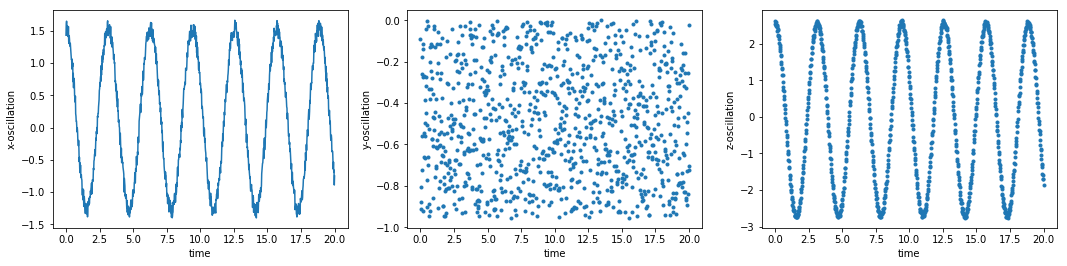

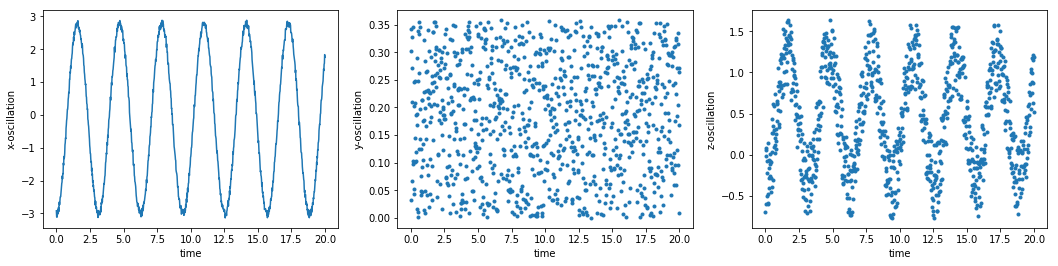

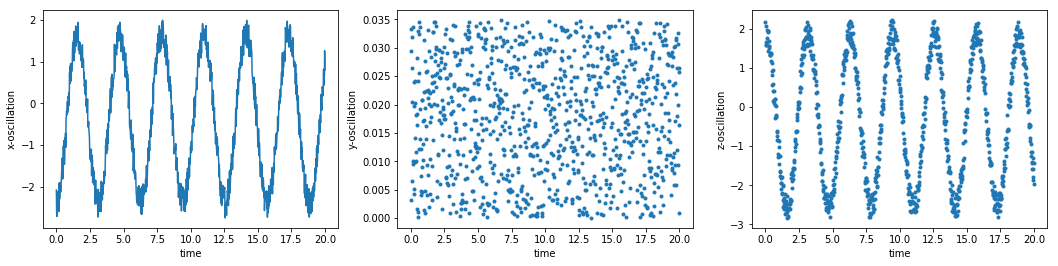

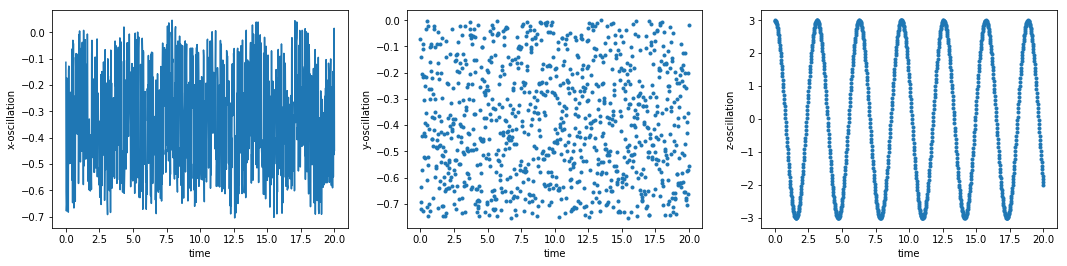

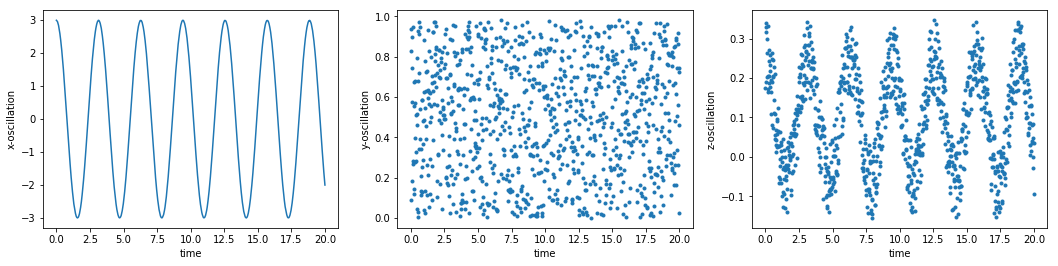

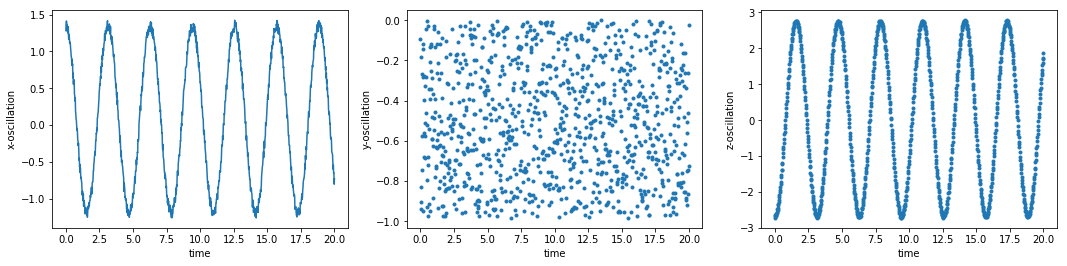

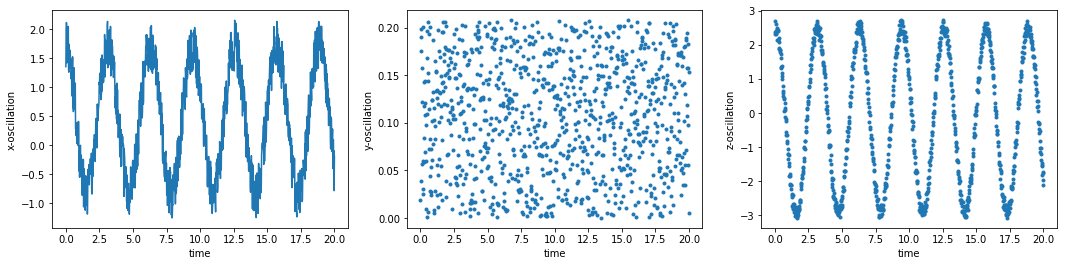

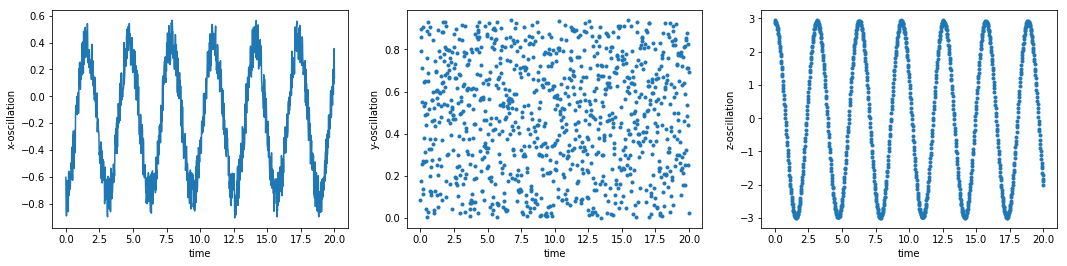

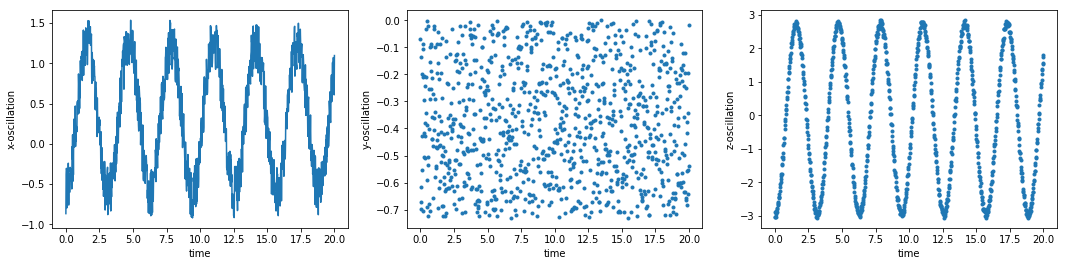

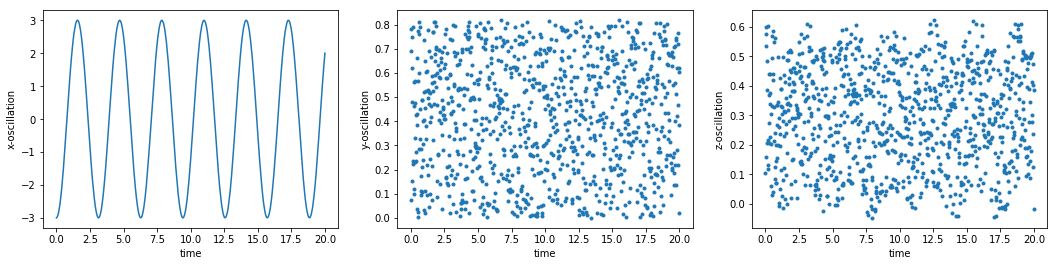

In [153]:
X_rot = []
for ang1, ang2 in zip(np.deg2rad(tetha), np.deg2rad(gamma)):
    R = np.dot(Ry(ang1), Rx(ang2))
    X_rot.append(np.dot(R,X))
print(X_rot[0].shape)

print('motions wrt cameras')
for X in X_rot:    
    fig, axes = plt.subplots(1, 3, figsize=(18,4))
    axes[0].set_xlabel('time')
    axes[0].set_ylabel('x-oscillation')
    axes[0].plot(t,X[0,:])

    axes[1].plot(t,X[1,:],'.')
    axes[1].set_xlabel('time')
    axes[1].set_ylabel('y-oscillation')

    axes[2].plot(t,X[2,:],'.')
    axes[2].set_xlabel('time')
    axes[2].set_ylabel('z-oscillation')

In [154]:
# PERFORMING PCA
variability = []
for (X, te, ga) in zip(X_rot, tetha, gamma):
    print('angles: tetha, gamma', te, ga)
    # taking only x and y coordinates
    l, V = np.linalg.eig(np.cov(X[:2,:]))
    Lambda=np.diag(l) # big lambda
    variability.append(Lambda[0,0]/Lambda.trace())
    print ("Percent of the total variability is explained by the principal components ", variability[-1])
    print ('\n')
print('best variability', np.max(variability))

angles: tetha, gamma 298 197
Percent of the total variability is explained by the principal components  0.9289854993887301


angles: tetha, gamma 165 291
Percent of the total variability is explained by the principal components  0.9974580969354045


angles: tetha, gamma 228 88
Percent of the total variability is explained by the principal components  0.999951156256576


angles: tetha, gamma 269 139
Percent of the total variability is explained by the principal components  0.009237120036764128


angles: tetha, gamma 357 11
Percent of the total variability is explained by the principal components  0.9824514833940822


angles: tetha, gamma 65 170
Percent of the total variability is explained by the principal components  0.9087493573552515


angles: tetha, gamma 295 282
Percent of the total variability is explained by the principal components  0.9960809483057086


angles: tetha, gamma 259 20
Percent of the total variability is explained by the principal components  0.7211214932834825


ang

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset
Notes: which are the most relevant features? find eigenvalue, eigenvectors. Define subset (ie. 90%) of all the fetaures.

In [155]:
data = np.loadtxt('../data/data_000637.txt',skiprows=1,delimiter=",")
print(data.shape)

(1310720, 6)


In [156]:
# print the description. This can (and better) be done from a terminal
!cat ../data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

(10,)
Percent of the total variability is explained by the principal components  0.6079678742042974
(5,)
Percent of the total variability is explained by the principal components, with less features  0.9457089607043833


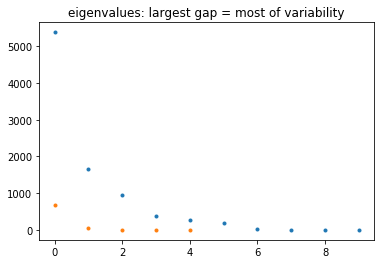

In [157]:
import pandas as pd
file_name="../data/magic04.data"
data=pd.read_csv(file_name,nrows=1000)
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

df = data.drop(columns=['category'])
X = df.values.T
# print(X)

variability = []
l, V = np.linalg.eig(np.cov(X))
print(l.shape)
plt.title('eigenvalues: largest gap = most of variability')
plt.plot(l, '.')
Lambda=np.diag(l) # big lambda
variability.append(Lambda[0,0]/Lambda.trace())
print ("Percent of the total variability is explained by the principal components ", variability[-1])

df = data.drop(columns=['category','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist'])
X = df.values.T
# print(X)

l, V = np.linalg.eig(np.cov(X))
print(l.shape)
plt.plot(l, '.')
Lambda=np.diag(l) # big lambda
variability.append(Lambda[0,0]/Lambda.trace())
print ("Percent of the total variability is explained by the principal components, with less features ", variability[-1])